In [1]:
! pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [20]:
# Load the CSV data
df = pd.read_csv('data/plot_data/block_normal/IPPO/42_IPPO_darwin.csv')

# Convert 'Log time' to datetime format
df['Log time'] = pd.to_datetime(df['Log time'], format='%m-%d %H:%M:%S')

# Use the row index as the episode number (starting from 1)
df['Episode'] = df.index + 1  # This makes it 1-indexed (starting from 1)

In [21]:
# Calculate the total training time
start_time = df['Log time'].min()
end_time = df['Log time'].max()

# Total training time in hours
training_time = (end_time - start_time).total_seconds() / 3600
print(f"Total training time: {training_time:.2f} hours")

Total training time: 5.00 hours


In [24]:
# Calculate the mean and std for each metric
mean_return = df['Return'].mean()
std_return = df['Return'].std()

mean_waiting = df['waiting_list'].mean()
std_waiting = df['waiting_list'].std()

mean_queue = df['queue_list'].mean()
std_queue = df['queue_list'].std()

mean_speed = df['speed_list'].mean()
std_speed = df['speed_list'].std()

print(f"Mean Return: {mean_return}, Std Return: {std_return}")
print(f"Mean Waiting List: {mean_waiting}, Std Waiting List: {std_waiting}")
print(f"Mean Queue List: {mean_queue}, Std Queue List: {std_queue}")
print(f"Mean Speed List: {mean_speed}, Std Speed List: {std_speed}")


Mean Return: -8.5525703125, Std Return: 14.886296111738549
Mean Waiting List: 5526.3875, Std Waiting List: 7606.606980732962
Mean Queue List: 211.9875, Std Queue List: 174.77316175437306
Mean Speed List: 5.361740922898121, Std Speed List: 1.4228314540011298


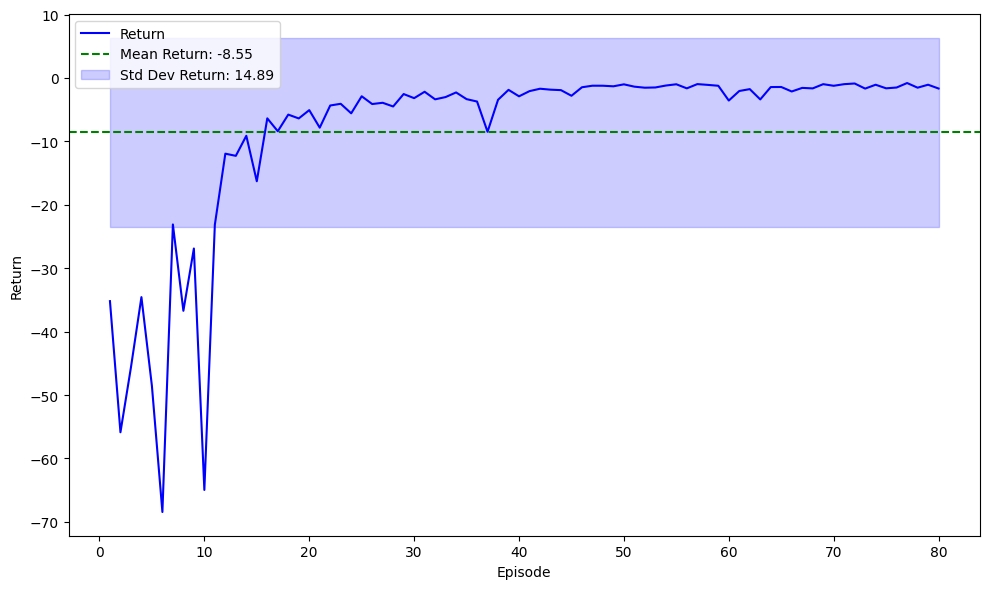

In [9]:
# Plot Return with mean and std
plt.figure(figsize=(10, 6))
plt.plot(df['Episode'], df['Return'], label='Return', color='blue')
plt.axhline(mean_return, color='green', linestyle='--', label=f'Mean Return: {mean_return:.2f}')
plt.fill_between(df['Episode'], 
                 mean_return - std_return, 
                 mean_return + std_return, 
                 color='blue', alpha=0.2, label=f'Std Dev Return: {std_return:.2f}')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()


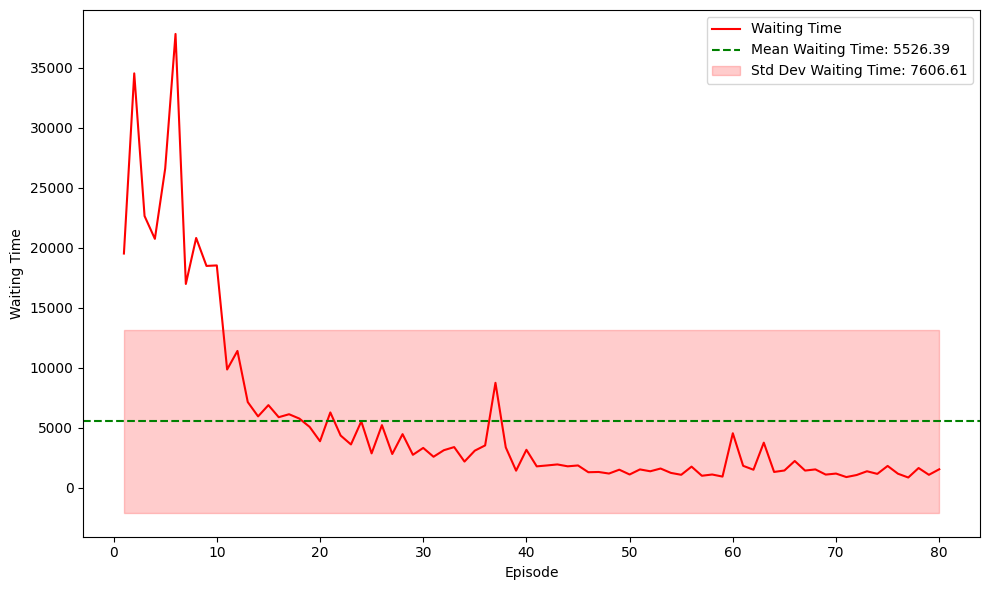

In [10]:
# Plot Waiting List with mean and std
plt.figure(figsize=(10, 6))
plt.plot(df['Episode'], df['waiting_list'], label='Waiting Time', color='red')
plt.axhline(mean_waiting, color='green', linestyle='--', label=f'Mean Waiting Time: {mean_waiting:.2f}')
plt.fill_between(df['Episode'], 
                 mean_waiting - std_waiting, 
                 mean_waiting + std_waiting, 
                 color='red', alpha=0.2, label=f'Std Dev Waiting Time: {std_waiting:.2f}')
plt.xlabel('Episode')
plt.ylabel('Waiting Time')
plt.legend()
plt.tight_layout()
plt.show()


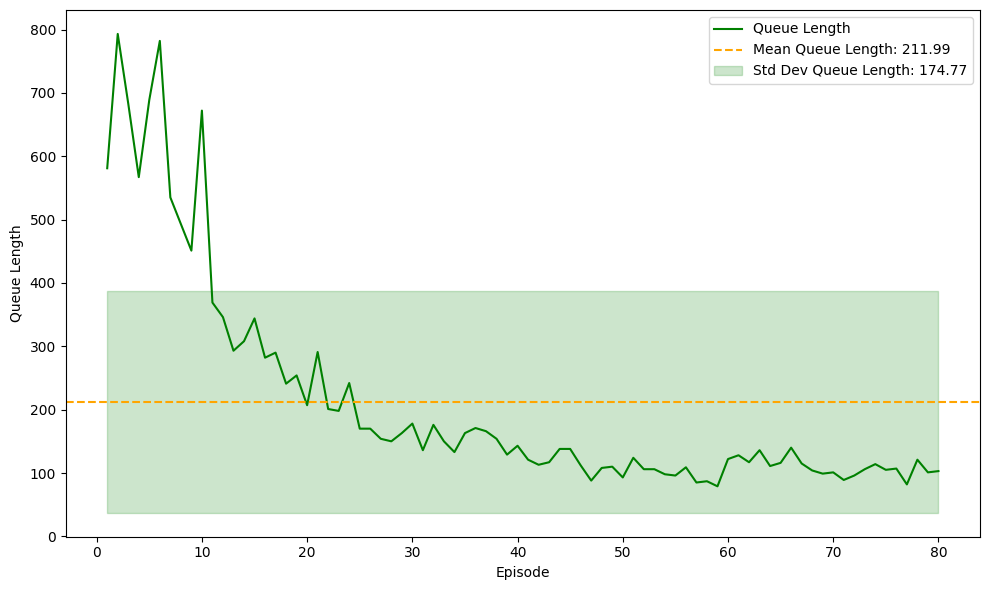

In [11]:
# Plot Queue List with mean and std
plt.figure(figsize=(10, 6))
plt.plot(df['Episode'], df['queue_list'], label='Queue Length', color='green')
plt.axhline(mean_queue, color='orange', linestyle='--', label=f'Mean Queue Length: {mean_queue:.2f}')
plt.fill_between(df['Episode'], 
                 mean_queue - std_queue, 
                 mean_queue + std_queue, 
                 color='green', alpha=0.2, label=f'Std Dev Queue Length: {std_queue:.2f}')
plt.xlabel('Episode')
plt.ylabel('Queue Length')
plt.legend()
plt.tight_layout()
plt.show()


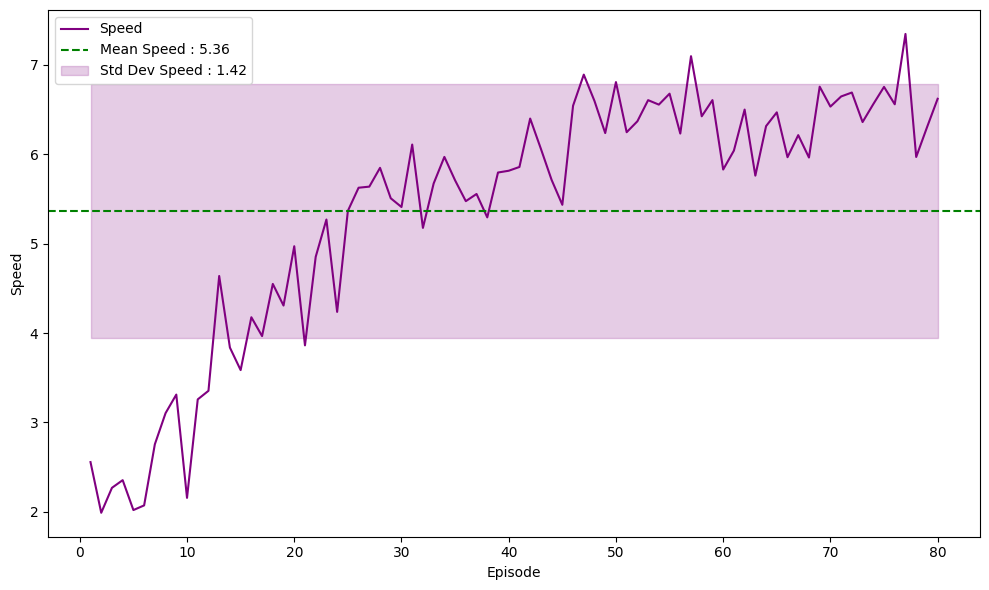

In [12]:
# Plot Speed List with mean and std
plt.figure(figsize=(10, 6))
plt.plot(df['Episode'], df['speed_list'], label='Speed', color='purple')
plt.axhline(mean_speed, color='green', linestyle='--', label=f'Mean Speed : {mean_speed:.2f}')
plt.fill_between(df['Episode'], 
                 mean_speed - std_speed, 
                 mean_speed + std_speed, 
                 color='purple', alpha=0.2, label=f'Std Dev Speed : {std_speed:.2f}')
plt.xlabel('Episode')
plt.ylabel('Speed')
plt.legend()
plt.tight_layout()
plt.show()
